# 1階層でのPredictive Codingの確認

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from dataset import Dataset

#I_scale = 10.0
I_scale = 1.0
dataset = Dataset(scale=I_scale)

In [47]:
print(len(dataset.patches))
print(np.std(dataset.patches))
print(np.mean(dataset.patches))

2375
2.1438892
-0.0016897094


In [45]:
#k1 = 0.5
#k2 = 1.0

k1 = 0.0005 # rの学習率
k2 = 0.005 # Uの学習率
iteration = 30

sigma_sq    = 1.0 # Iの生成観測分布の分散
sigma_sq_td = 10.0 # rの生成観測分布の分散
alpha1      = 1.0 # rの事前分布の精度パラメータ (分散の逆数)
alpha2      = 0.05 # r_tdの事前分布の精度パラメータ (分散=20.0, 標準偏差4.5)
lambd       = 0.02 # Uの事前分布の精度パラメータ　(分散=50.0, 標準偏差7.1)

U_scale     = 7.0

Us = (np.random.rand(3,256,32)-0.5) * U_scale
rs = np.zeros([3, 32], dtype=np.float32)

patch_size = len(dataset.patches) # 2375

for k in range(patch_size):
    rs = np.zeros([3, 32], dtype=np.float32)
    
    for i in range(iteration):
        for j in range(3):
            I = dataset.get_image(k, j)
            r = rs[j]
            U = Us[j]
            Ur = U.dot(r)
            error = I - Ur
            dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
            dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
            rs[j] += dr
            Us[j] += dU
    
    if k % 100 == 0:
        print("us mean={} std={}".format(np.mean(Us[0]), np.std(Us[0])))                                    
        print("rs mean={} std={}".format(np.mean(rs), np.std(rs)))
    
    if k % 40 == 0:
        k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        

us mean=-0.01267145674518634 std=2.0020215741471183
rs mean=4.881763135707772e-18 std=3.896670518213982e-17
us mean=-0.009428036218567809 std=1.4949053336874718
rs mean=6.902582390466705e-05 std=0.0013326111948117614
us mean=-0.007031305935481699 std=1.12779836735962
rs mean=0.0003518305311445147 std=0.013155334629118443
us mean=-0.005222431184190015 std=0.8601040891010777
rs mean=-0.00202839239500463 std=0.01587883196771145
us mean=-0.00390876902063257 std=0.6623278424914758
rs mean=9.021780181249442e-18 std=9.706711701914584e-17
us mean=-0.0029764302056127304 std=0.5153115206486665
rs mean=3.166807118759607e-06 std=0.0068255518563091755
us mean=-0.000695607350350679 std=0.43398495287586775
rs mean=-0.02147885225713253 std=0.19187192618846893
us mean=0.0018647468911947747 std=0.4547310955844053
rs mean=0.005667101126164198 std=0.15018735826015472
us mean=0.0014288374164454568 std=0.4612165494787251
rs mean=-0.004344971384853125 std=0.09655142575502396
us mean=-5.4078574313498606e-05 s

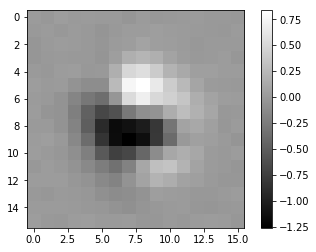

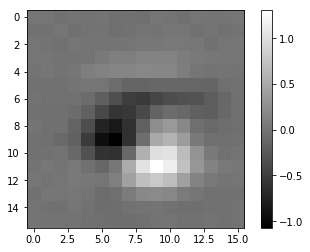

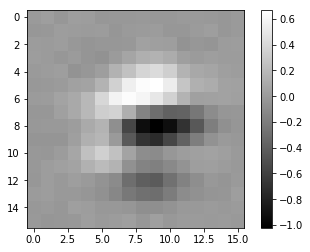

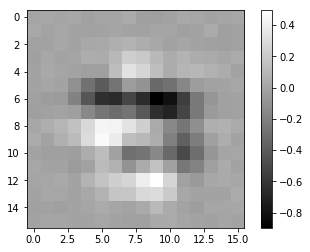

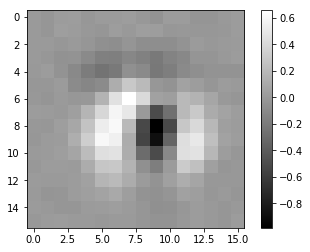

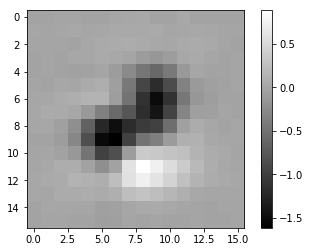

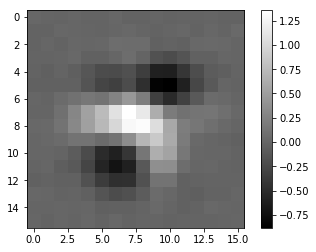

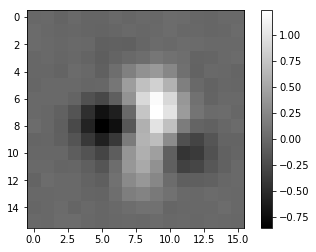

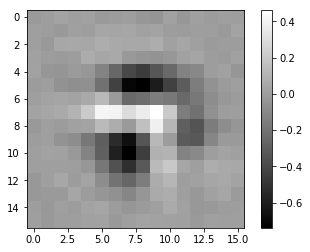

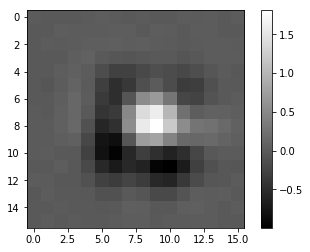

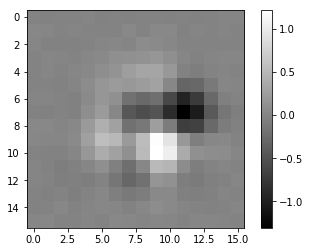

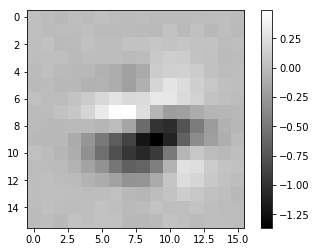

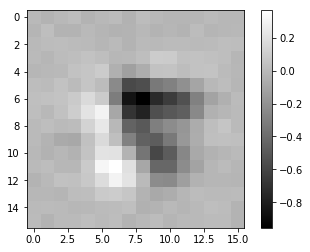

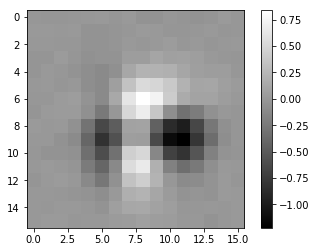

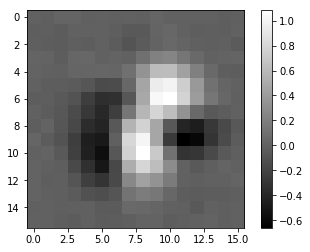

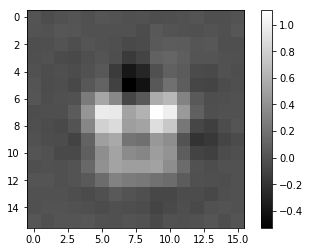

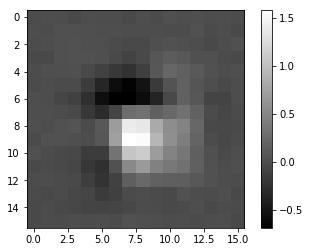

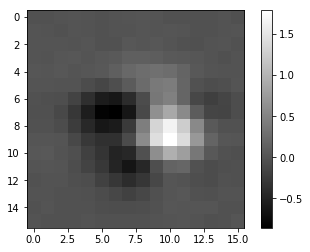

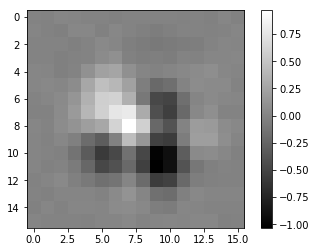

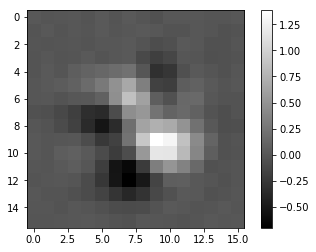

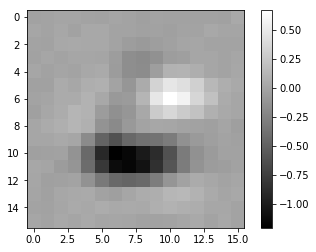

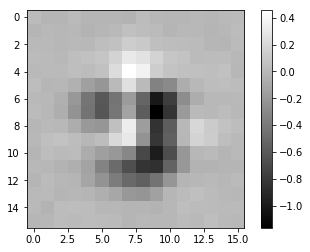

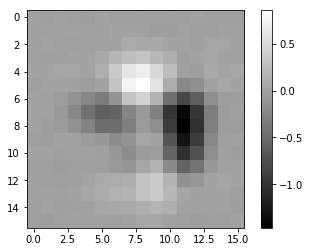

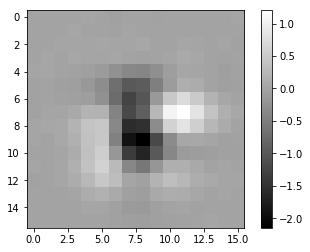

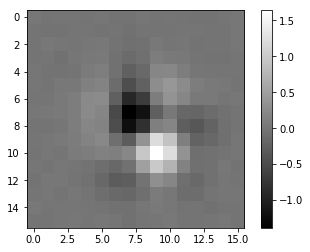

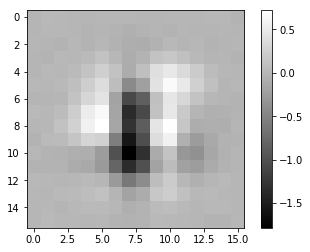

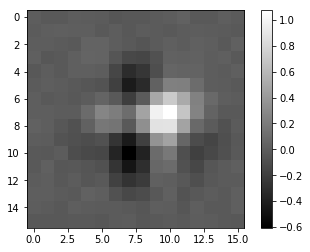

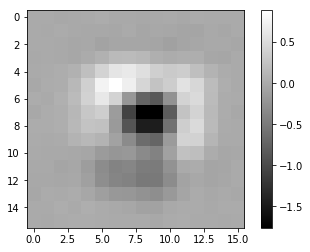

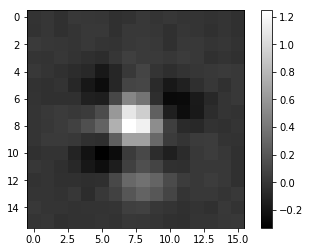

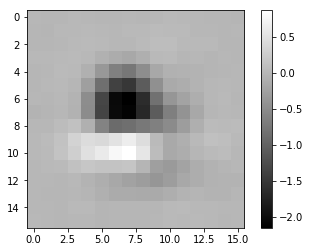

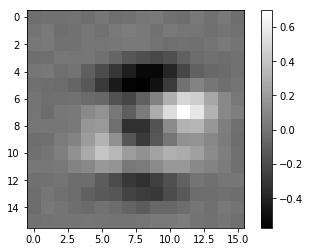

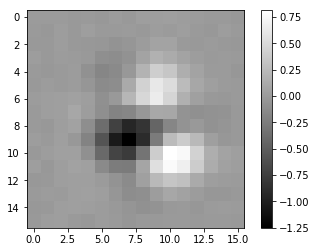

In [46]:
for i in range(32):
    u = Us[1][:,i].reshape(16,16)
    plt.figure()
    plt.imshow(u, cmap='gray')
    plt.colorbar()
    plt.show()

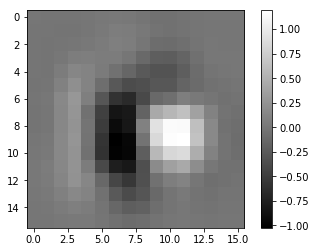

In [23]:
I = dataset.get_image(505, 0)

plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

## 再構成の確認

[-0.00733726 -0.02961655  0.00837841  0.0112283  -0.0228501  -0.03945574
  0.02293501 -0.02099994 -0.00254676  0.0771682  -0.01054377 -0.03239862
  0.04045471 -0.02413691 -0.00609922 -0.0233817  -0.01092735 -0.00669431
  0.02115077 -0.00411704  0.00337022  0.00604809  0.00374136  0.01663036
  0.02623409 -0.01279419 -0.01809033  0.00223888  0.03376782  0.00867649
 -0.01835511 -0.01658639]


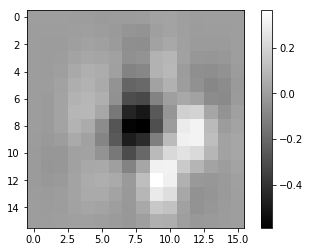

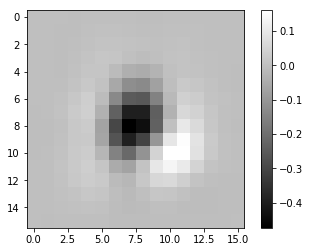

In [48]:
image_index = 506
I = dataset.get_image(image_index, 0)
rs = np.zeros([3, 32], dtype=np.float32)

for i in range(30):
    r = rs[j]
    U = Us[j]
    Ur = U.dot(r)
    error = I - Ur
    dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
    rs[j] += dr

U = Us[j]
r = rs[j]

print(r)

I_rec = U.dot(r)

plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(I_rec.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()